[Oregon Curriculum Network](http://4dsolutions.net/ocn/)

[School of Tomorrow (Home)](School_of_Tomorrow.ipynb)

[PyCampNextLevel Outline](PyCampNextLevel.ipynb)

![animated](anim.gif)

![casino math](https://wikieducator.org/images/9/9a/Casino_math.jpg)

# Casino Math

Welcome to this Casino Math worksheet.  At the School of Tomorrow (an allusion to a certain movie and book), we follow [a Silicon Forest proposal](https://wikieducator.org/Digital_Math) from my Oregon Curriculum Network, to look at maths in four dimensions:  [Casino](https://wikieducator.org/Casino_Math), Supermarket, Neolithic and Futuristic (also known as Martian).

In Casino Math we work with randomness, permutations, combintatorics, statistics, predictive models, ways of managing risk.  

In some subcultures ("cults") the Chief Risk Officer (CRO) has high hopes of joining the C-suite (CEO, CFO...).

<blockquote>
The chief risk officer or chief risk management officer of a firm or corporation is the executive accountable for enabling the efficient and effective governance of significant risks, and related opportunities, to a business and its various segments. Risks are commonly categorized as strategic, reputational, operational, financial, or compliance-related. CROs are accountable to the Executive Committee and The Board for enabling the business to balance risk and reward. In more complex organizations, they are generally responsible for coordinating the organization's Enterprise Risk Management approach. 
</blockquote>

Every culture has ways of anticipating chaos (noise and uncertainty, disruption -- see VUCA) and coping with risks, however formalized with job titles and legal frameworks.

### Workbench Tools

Every craft has its workbench tools, which may be heavy (hard to move) or as light as a feather.  In Casino Math, with may think in terms of games of chance, expectations of winnings, possible outcomes and so on.  We inherit from the culture of statisticians, which includes actuarial sciences and their somewhat morbid concerns (causes of death, likelihood of death by cause).  

Games have always included their life and death themes, amidst which we move our avatars, which have their lifetimes and levels.

As of 2020, the Python toolkit has acheived widespread acceptance in many walks of life.  At the School of Tomorrow, we assume these tools as a part of our Calculator of Tomorrow.  The handheld calculator is still a useful tool, however our mission here (a form of prostelytizing), our bias, is towards using Jupyter Notebooks as a front end.

<img src="./handheld_calculators.jpg" width="500" />

On the backend, you will attach to (import) various tools, and not necessarily investigate their internals at every turn, given the work at hand.

We're starting over with the basics in some sense, and yet availing ourselves of state of the art tools in another.  Lets combine assumed naivte with state of the art sophistication.

In [1]:
import numpy as np

## Integration

Integration is a way of accumulating, as the MIT lecture linked below well explains.  The integration-differentiation trip is a round trip.  The first accumulates sums whereas the second dissects an accumulation into successive growth rates (change rates), so-called "slopes".  The slope of something is a measure of steepness or rate of change.

* [Big Picture of Calculus](https://youtu.be/UcWsDwg1XwM)
* [Big Picture Derivatives](https://youtu.be/T_I-CUOc_bk)

![math dream](https://media.giphy.com/media/26gR0YFZxWbnUPtMA/giphy.gif)

The salient feature of our high school level approach is we assume people of any age, with lots of experience, have reason to go through high school again, not because they've "forgotten everything" but because the content changes, or should.  We have stopped picturing the high school curriculum as static, with "future shock" always postponed.  The future is shocking mostly if you've had some expectation of a static condition, a status quo.  That's an unrealistic expectation in many subcultures.

### Connecting Calculus with Statistics
The high school calculus I went through was quite divorced from statistics.  The statisticians refer to probability density functions, and associated cumulative density functions, where the latter is the integral of the former, but the high school delta calc teachers rarely did much in the other direction, to connect their textbooks with the ones used in statistics.

![derivative](https://media.giphy.com/media/3o7WIxxI7tLStjR2p2/giphy.gif)

The fracturing of disciplines into too many subdisciplines is what led Buckminster Fuller (critical to our School of Tomorrow curriculum) to sound the alarm in *Operating Manual for Spaceship Earth* wherein he circled "overspecialization" as a leading cause of species and/or cultural extinction.

In [2]:
def integrate(f, dx=1e-08):
    
    def sumup(a, b):
        accum = 0
        summing = True

        while summing:
            accum += dx * f(a)  # slice of area
            a += dx             # increment a by dx
            if a >= b:          # are we there yet?
                summing = False # stop summing
        
        return accum
            
    return sumup # return the callable function

Looking for [Symbolic Integration](http://www.learningaboutelectronics.com/Articles/How-to-find-the-integral-of-a-function-in-Python.php)?

What's important to our approach above is "to integrate" (the verb) is applied to a function, and returns a function.  Ditto for differentiation.  

Both the integrate and differentiate functions eat functions and return functions.  Notice the keyword ```def``` inside an outer ```def```:  that's a function being defined and then returned as the end product.  What the returned function will "eat" (in terms of x) is left for later.

The internal ```sumup``` function has a single responsibibility, to accumulate ```dx * f(a)``` rectangles per the standard textbook intro.  Trek across a curve accumulating all the areas.  That's purposely rather simple-minded.

![Riemann Sum](https://media.giphy.com/media/prqer53bXBopG/giphy.gif)

[Riemann_Sum on Wikipedia](https://media.giphy.com/media/prqer53bXBopG/giphy.gif)

Clearly dx is not *infinitely* small so this is still digital more than continuous mathematics.  That's not unusual as "the continuous" is associated with the "theoretical limit" which we only approximate with our assumed values for delta x.  

We'll be allowing it to be larger that 0.00000001 in examples below.

In [3]:
"{:e}".format(0.00000001)

'1.000000e-08'

In [4]:
def differentiate(f, dx=1e-8):
    def differ(x):
        return ((f(x+dx) - f(x))/dx)
    return differ

Again, the default dx is a token "very small" value.  The returned function will have taken whatever value "to heart" i.e. the time to set it is when asking to differentiate.  

The differ function is a "wiggler" in that it slightly wiggles x to get a corresponding wiggle in y, which it then ratios.  A good mnenomic for "slope" is: wiggle in y divided by wiggle in x, with y considered the "dependent" variable thanks to the function connecting them.  We usually say "delta" in place of "wiggle" which also means "change".

![slope at a point](https://media.giphy.com/media/rDaWuLJZxAp6o/giphy.gif)

The reason we call ordinary calculus "delta calc" is because it's about studying rates of change, and how those rates affect accumulation.  A sloping upward line adds larger area slices.

In [5]:
def line_maker(slope, intercept):
    m, b = slope, intercept
    def line(x):
        y = m * x + b
        return y
    return line

Again, the focus is on functions that make functions, which we call factory functions.  ```line_maker``` is designed to spit out any linear function, with any slope and y-intercept we desire.  Such lines become the focus of "linear regression" problems later, wherein we're looking for a "best fit" predictor, some function that does the best job of predicting y, given x, and assuming some quasi-linear relationship.

We do not expect linear functions to precisely predict outcomes, but to do so within some interval of confidance.  Computing that interval, based on actual sample data, is the topic of another worksheet.

In [6]:
domain = np.arange(0,5,.01)

In [7]:
pretty_steep = line_maker(4, 2)
output = [pretty_steep(x) for x in domain]

In [8]:
output[:10]  # first 10 points

[2.0, 2.04, 2.08, 2.12, 2.16, 2.2, 2.24, 2.2800000000000002, 2.32, 2.36]

In [9]:
import matplotlib.pyplot as plt

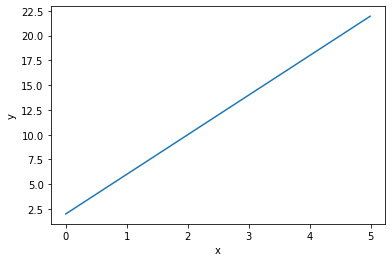

In [10]:
fig = plt.figure() # fresh and new
ax  = plt.subplot('111')
plt.xlabel("x")
plt.ylabel("y")
ax.plot(domain, output);

In [11]:
integral_pretty_steep = integrate(pretty_steep, dx=0.01)  # return a function

In [12]:
output = [integral_pretty_steep(min(domain), x) for x in domain]

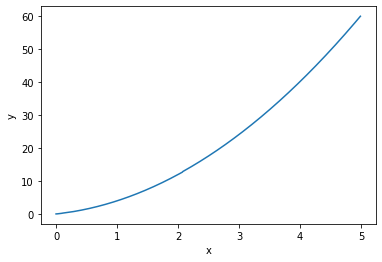

In [13]:
fig = plt.figure() # fresh and new
ax  = plt.subplot('111')
plt.xlabel("x")
plt.ylabel("y")
ax.plot(domain, output);

In [14]:
domain = np.arange(0,5,.01)

Our integral functions approximates the area under a curve from some starting value to some x value. In order to fix the starting value, we might use ```functools.partial```.  It gives us a new function with a first value already filled in.  That's for the benefit of the differentiator, which returns a function that expects one argument only, the area from some fixed ```a``` to our current ```x```.
```python
    def differentiate(f, dx=1e-8):
        def differ(x):
            return ((f(x+dx) - f(x))/dx)
        return differ
```

In [15]:
from functools import partial
definite_integral = partial(integral_pretty_steep, min(domain)) # bind a
Df = differentiate(definite_integral, 0.01)

In [16]:
output = [Df(x) for x in domain]

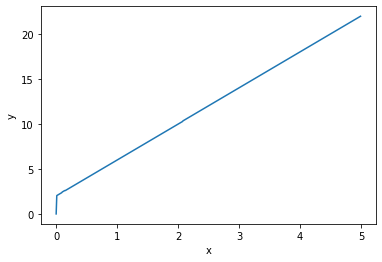

In [17]:
fig = plt.figure() # fresh and new
ax  = plt.subplot('111')
plt.xlabel("x")
plt.ylabel("y")
ax.plot(domain, output);

## Normal Distribution

So far, this presentation has not deviated too much from the usual / average presentation of delta calculus, but for calling it "delta calc" and introducing triangles and tetrahedrons as paradigm area and volume shapes.

For the most part, we'll keep going back to XY and XYZ grid computations and leave the futuristic stuff to Martian Math.

However, another departure from normal is to feature the Normal Distribution early and often, with other Probably Distribution Functions to follow.  We will adhere to a statistics intensive presentation in other words.  The bridge from pdf to cdf is one of integration, and vice versa.

In [18]:
from IPython.display import display, Latex

ltx = '$ pdf(x,\\mu,\\sigma) = \\frac{1}{ \\sigma' + \
 '\\sqrt{2 \\pi}} e^{\\left(-\\frac{{\\left(\\mu - ' + \
 'x\\right)}^{2}}{2 \\, \\sigma^{2}}\\right)} $'
display(Latex(ltx))

<IPython.core.display.Latex object>

In [19]:
import math
def g(x):
    return (1/(sigma * math.sqrt(2 * np.pi))) * math.exp(-0.5 * ((mu - x)/sigma)**2)

By adjusting sigma and mu below, you're free to describe any "bell curve" under the sun.  A typical procedure is to "alter perspective" by mapping any and every bell curve to the standard bell curve, checking the Z-Score, and learning what constitutes a "standard deviation" in terms of original units.

In [20]:
sigma = 1; mu = 0

In [21]:
vg = np.vectorize(g)

In [22]:
domain = np.arange(-5,5,.01)

In [23]:
output = vg(domain) # thanks to vectorize, we can dispense with the looping structure

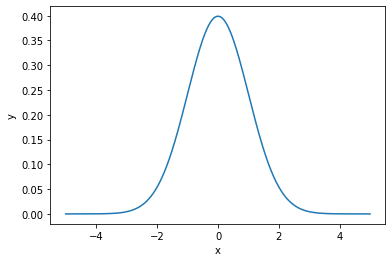

In [24]:
fig = plt.figure() # fresh and new
ax  = plt.subplot('111')
plt.xlabel("x")
plt.ylabel("y")
ax.plot(domain, output);

In [25]:
cdf = integrate(vg, 0.01)

In [26]:
output = [cdf(min(domain), b) for b in domain]   # this could take a long time....

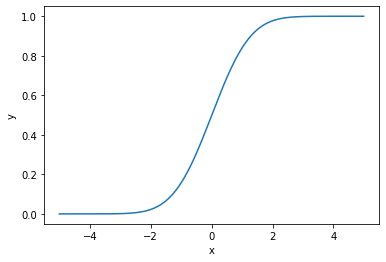

In [27]:
fig = plt.figure() # fresh and new
ax  = plt.subplot('111') # 1 row, 1 column, subplot 1
plt.xlabel("x")
plt.ylabel("y")
ax.plot(domain, output);

In [28]:
import scipy.integrate as integral

In [29]:
result =  [integral.quad(vg, min(domain), b)[0] for b in domain]

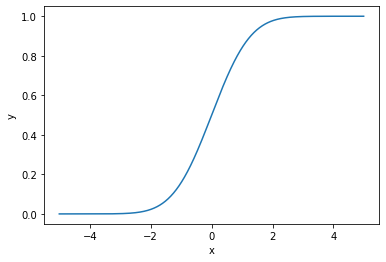

In [30]:
fig = plt.figure() # fresh and new
ax  = plt.subplot('111') # 1 row, 1 column, subplot 1
plt.xlabel("x")
plt.ylabel("y")
ax.plot(domain, result);

In [31]:
domain = np.arange(-5,5,.01)
definite_integral = partial(cdf, min(domain))
Df = differentiate(definite_integral, 0.01)

Here's the idea of a definite integral.  How much have we accumulated between start point ```a``` and end point ```b```?

![matplotlib integral](https://matplotlib.org/3.2.1/_images/sphx_glr_integral_001.png)

[Original Gallery](https://matplotlib.org/3.2.1/gallery/showcase/integral.html)

In [32]:
output = [Df(x) for x in domain]  # this could take a long time....

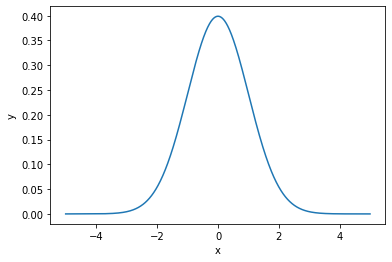

In [33]:
fig = plt.figure() # fresh and new
ax  = plt.subplot('111') # 1 row, 1 column, subplot 1
plt.xlabel("x")
plt.ylabel("y")
ax.plot(domain, output);

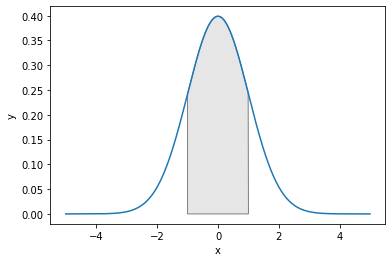

In [34]:
from matplotlib.patches import Polygon

fig = plt.figure() # fresh and new
ax  = plt.subplot('111') # 1 row, 1 column, subplot 1
plt.xlabel("x")
plt.ylabel("y")
ax.plot(domain, output)
ix = np.arange(-1,1,.01)
iy = vg(ix)
output = vg(domain) # thanks to vectorize, we can dispense with the looping structure
verts = [(-1, 0), *zip(ix, iy), (1, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)
plt.show();

## Now that we've seen all that...

scipy.stats has ```norm``` so we *don't have to* hand-code integration

In [35]:
from scipy.stats import norm

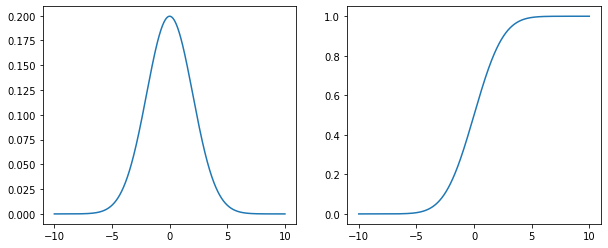

In [36]:
fig = plt.figure(figsize=(10,4)) # fresh and new

ax  = plt.subplot('121') # 1 row, 1 column, subplot 1
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-10, 10, 0.001)
# Mean = 0, SD = 2.
plt.plot(x_axis, norm.pdf(x_axis,0,2))

ax  = plt.subplot('122') # 1 row, 1 column, subplot 1
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-10, 10, 0.001)
# Mean = 0, SD = 2.
plt.plot(x_axis, norm.cdf(x_axis,0,2))

plt.show();

# APPENDIX:  ABOUT AREA AND VOLUME

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/15733544935/in/album-72157624750749042/" title="2 x 2 &#x3D; 4"><img src="https://live.staticflickr.com/5611/15733544935_8f001fc396_w.jpg" width="400" height="300" alt="2 x 2 &#x3D; 4"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

Area of lower triangle = 4 in equilateral triangular units (etus).

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/39851434361/in/album-72157624750749042/" title="4 x 8 &#x3D; 32"><img src="https://live.staticflickr.com/4621/39851434361_8dc2f5f7fa_w.jpg" width="400" height="389" alt="4 x 8 &#x3D; 32"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

Area of lower triangle = A times B (the two edge lengths from any angle) in etus.

Picture an equilateral triangle, with a 60 degree apex.  As the apex gradually rises above the base, all angles remain 60 degrees, however the total area is increasing as a 2nd power of the linear rate of change, measured by altitude or any edge.  A second power curve would start a 0 and show the increasing area as a curve, the right half of a parabola.

A regular tetrahedron's volume would likewise increase at the 3rd power rate, as all the edges increased at a linear rate.  Such is the ```edge:area:volume``` relationship for any shape.

![clustering data points](https://media.giphy.com/media/wZ04FZrdMqCDC/giphy.gif)